In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import leastsq

## Least Square Method

Objective function: 
$$
y = sin(2\pi x)
$$

In [2]:
def obj_func(x: np.ndarray) -> np.ndarray:
    return np.sin(2 * np.pi * x)

def fit_poly_func(p: np.ndarray, x: np.ndarray) -> np.ndarray:
    f = np.poly1d(p)
    return f(x)

def residuals_func(p: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return fit_poly_func(p, x) - y

In [3]:
x_train = np.linspace(0, 1, 10)
y_train = obj_func(x_train) + np.random.normal(0, 0.1, x_train.shape)  # Add noise
x_points = np.linspace(0, 1, 1000)

In [4]:
def fitting(M: int):
    """
    M: int
        Degree of polynomial to fit
    """
    p_init = np.random.rand(M + 1)  # Initial guess for polynomial coefficients
    p_lsq = leastsq(residuals_func, p_init, args=(x_train, y_train))
    print("Fitting Parameters:", p_lsq[0])

    plt.plot(x_points, obj_func(x_points), "g", label="True Function")
    plt.plot(x_points, fit_poly_func(p_lsq[0], x_points), "b", label="Fitted Polynomial")
    plt.scatter(x_train, y_train, c="r", label="Training Data")
    plt.title(f"Polynomial Degree {M}")
    plt.legend()

    return p_lsq

Fitting Parameters: [-0.04543027]


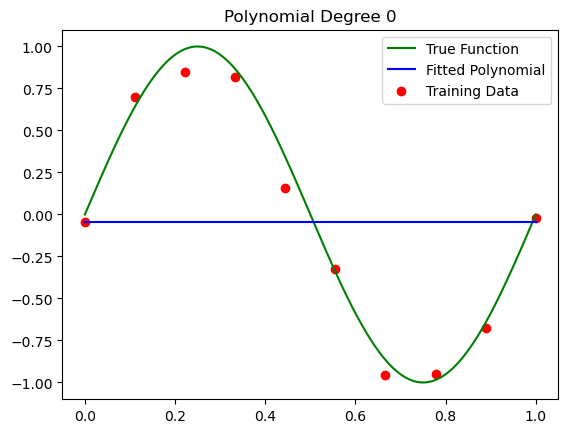

In [5]:
p_lsq0 = fitting(0)

Fitting Parameters: [-1.31782115  0.61348031]


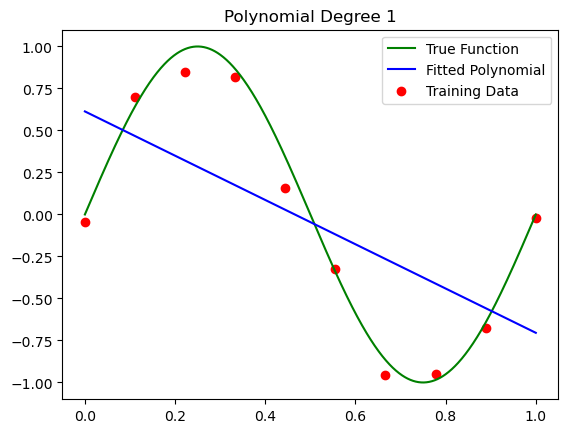

In [6]:
p_lsq1 = fitting(1)

Fitting Parameters: [ 0.24714147 -1.56496259  0.65009386]


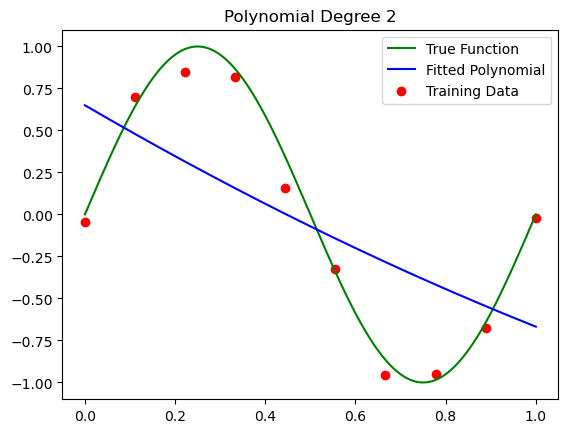

In [7]:
p_lsq2 = fitting(2)

Fitting Parameters: [ 20.3832392  -30.32771721  10.03586845  -0.05451192]


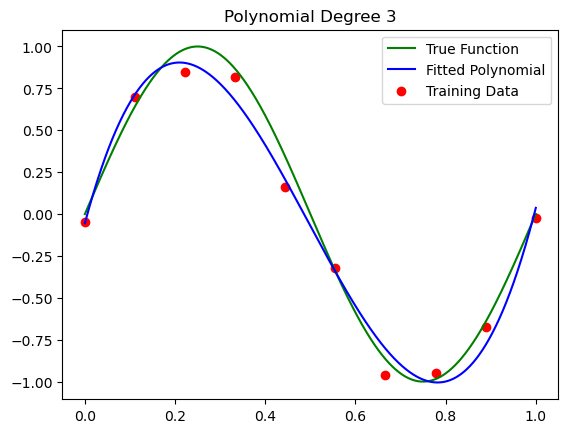

In [8]:
p_lsq3 = fitting(3)

Fitting Parameters: [ -3.23370686  26.85065302 -34.35987037  10.83431467  -0.07580383]


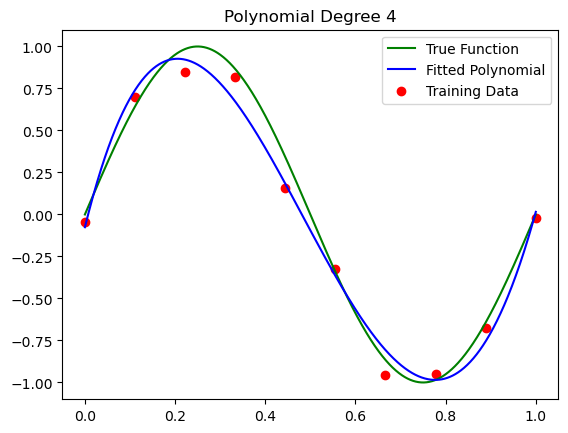

In [9]:
p_lsq4 = fitting(4)

Fitting Parameters: [-3.68389913e+01  8.88637756e+01 -5.34977724e+01 -5.93471787e+00
  7.42423186e+00 -3.83715150e-02]


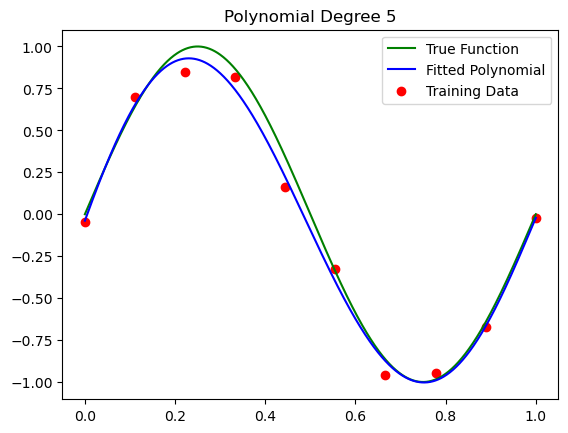

In [10]:
p_lsq5 = fitting(5)

Fitting Parameters: [-3.76114218e+01  7.59952873e+01 -3.79851037e+01  1.21428397e+01
 -2.11854599e+01  8.66038432e+00 -4.30038917e-02]


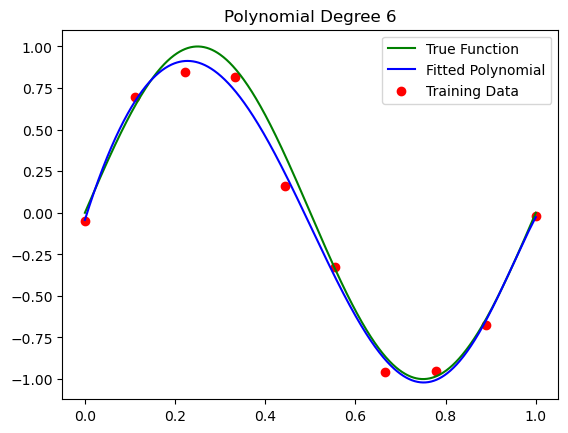

In [11]:
p_lsq6 = fitting(6)

Fitting Parameters: [ 3.32957076e+02 -1.20296162e+03  1.68181091e+03 -1.13914799e+03
  4.01582190e+02 -8.68569796e+01  1.26402908e+01 -4.66841810e-02]


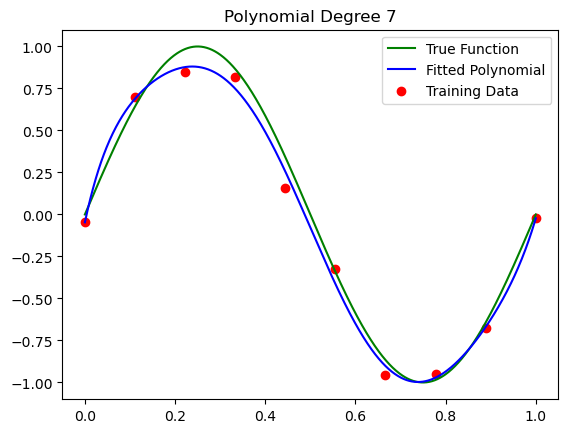

In [12]:
p_lsq7 = fitting(7)

Fitting Parameters: [-3.37077142e+02  1.68125588e+03 -3.40516466e+03  3.56939552e+03
 -2.04580084e+03  6.41914873e+02 -1.18720013e+02  1.42202721e+01
 -4.69048554e-02]


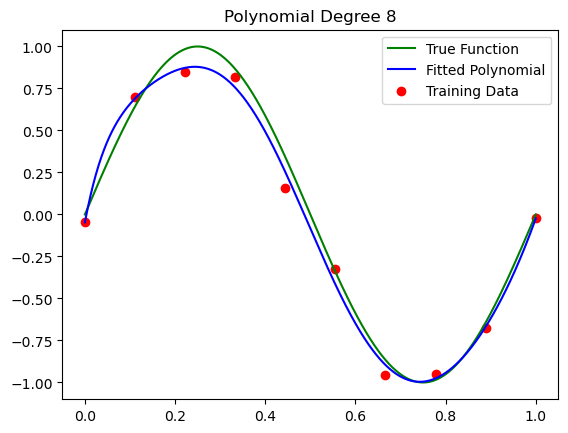

In [13]:
p_lsq8 = fitting(8)

Fitting Parameters: [ 3.83310376e+04 -1.72826392e+05  3.27702428e+05 -3.39530123e+05
  2.08843553e+05 -7.73929138e+04  1.66804431e+04 -1.89931522e+03
  9.13078989e+01 -4.76429910e-02]


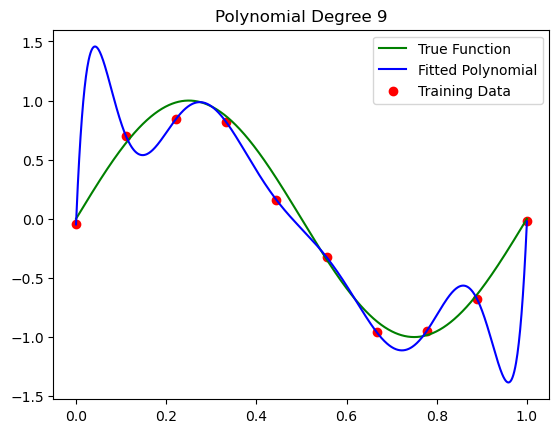

In [14]:
p_lsq9 = fitting(9)

---

## Regularization

In [15]:
def residuals_func_regularized(p: np.ndarray, x: np.ndarray, y: np.ndarray, lam: float) -> np.ndarray:
    ret = fit_poly_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5 * lam * np.square(p)))

    return ret

Fitting Parameters without Regularization:
 [ 3.83310376e+04 -1.72826392e+05  3.27702428e+05 -3.39530123e+05
  2.08843553e+05 -7.73929138e+04  1.66804431e+04 -1.89931522e+03
  9.13078989e+01 -4.76429910e-02]
Fitting Parameters with Regularization:
 [ -3.66871804  -2.19292027   0.67703159   4.26593542   6.98876644
   5.9805231   -2.49238143 -17.62385138   8.05952824  -0.02042216]


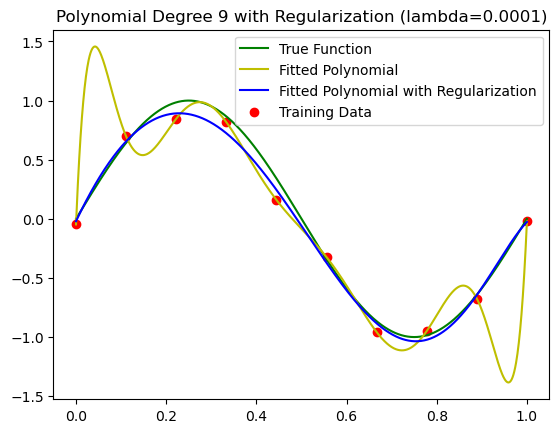

In [16]:
M = 9
lam = 0.0001
p_init = np.random.rand(M + 1)  # Initial guess for polynomial coefficients
p_lsq9 = leastsq(residuals_func, p_init, args=(x_train, y_train))
print("Fitting Parameters without Regularization:\n", p_lsq9[0])
p_lsq_reg = leastsq(residuals_func_regularized, p_init, args=(x_train, y_train, lam))
print("Fitting Parameters with Regularization:\n", p_lsq_reg[0])
plt.plot(x_points, obj_func(x_points), "g", label="True Function")
plt.plot(x_points, fit_poly_func(p_lsq9[0], x_points), "y", label="Fitted Polynomial")
plt.plot(x_points, fit_poly_func(p_lsq_reg[0], x_points), "b", label="Fitted Polynomial with Regularization")
plt.scatter(x_train, y_train, c="r", label="Training Data")
plt.title(f"Polynomial Degree {M} with Regularization (lambda={lam})")
plt.legend()